# UC Subreddit Upvote Prediction
### Analyzing Post Features and Engagement Across the UC Sub-Reddit System


## 1. Introduction

Reddit is one of the largest discussion and bonding platforms for college communities, especially UC's. Each UC campus' subreddit has specific cultures, trends, and content patterns. These communities are especially useful for students to voice their opinions or share a funny story!

Take this as an example:

<img src="images\Screenshot 2025-11-12 225912.png" width="800">

This project aims to analyze Reddit posts from various UC subreddits to predict how many upvotes a post will earn based on its content, metadata, and engagement features. We thought this was interesting because you can analyze individual UC subreddits to see the differences in culture communities.

However, a practical use being if you were a club trying to have people go to your event:
What factors influence your post being brought up to the front page?
Or, how you could get the most engagement out of your post?

### **Practical Terminology**

Terms and Descriptions for Common Reddit Terms:
| Term | Meaning | Relevance to the Project |
|------|---------|---------------------------|
| **Upvote** | A + positive vote indicating support | Our main target variable |
| **Downvote** | A - negative vote indicating disagreement | Affects score, (negatively) but not always included |
| **Score** | Upvotes − Downvotes | Sometimes differs from "upvotes" field |
| **Upvote Ratio** | % of total votes that are upvotes | Proxy for sentiment/approval |
| **Karma** | A user’s total upvote score on Reddit | Used as a predictor of credibility |
| **OP** | "Original Poster": the person who created the post | We track OP karma & account age |
| **Flair** | A label for the post ("Funny", "School", etc.) | Helps to categorize content |
| **Mods** | Subreddit moderators | They influence which posts stay or get removed |
| **NSFW** | “Not Safe For Work” content flag | Included as a binary feature |
| **Hot** | A listing sorted by engagement + time decay | Affects which posts we scraped |
| **Top** | A listing sorted purely by score | May bias dataset toward high-engagement posts |
| **New** | A listing sorted by recent posts | Influences visibility + upvotes |
| **Shitpost** | Low-effort or joke post (Usually funny) | Often gets lots of votes in college subreddits |
| **Copypasta** | A repeated block of text/meme | Signals humor, may influence upvote behavior |


### **Research Questions**

**RQ1 (Prediction):**  
To what extent can we predict the upvote count of a UC subreddit post using post content (title length, sentiment), posting metadata (hour, listing type), and subreddit-level characteristics (subscriber count, campus community)?

**RQ2 (Explanation):**  
How do engagement patterns differ across UC campuses, and do certain campuses reward different types of content more than others?

The goal is to combine exploratory analysis and machine learning to uncover meaningful patterns in campus-level Reddit engagement.

## 2. Study Design & Data Description

We scraped posts from the *top*, *hot*, and *new* listings for nine UC subreddits using Reddit’s public JSON API.
However, since these listings contain high-visibility posts, this dataset may be biased toward successful or recent posts.

### Subreddits included:
- r/UCSD  
- r/UCLA  
- r/Berkeley  
- r/UCSantaBarbara  
- r/UCI  
- r/UCDavis  
- r/UCSC  
- r/ucr  
- r/ucmerced  

### Dataset Structure
| Category | Variable | Description |
|----------|----------|-------------|
| **Post Content** | `title` | Text of the post title |
| | `title_length` | Length of the title (engineered feature) |
| | `sentiment` | Sentiment score of the title |
| **Engagement Metrics** | `upvotes` | Number of upvotes |
| | `upvote_ratio` | Proportion of upvotes / total votes |
| | `num_comments` | Number of comments|
| **Post Metadata** | `listing` | Where the post was scraped from: (top/hot/new) |
| | `created_utc` | Timestamp of post |
| | `hour` | Hour of day post was made (engineered feature) |
| **Content Type** | `has_media` | Whether the post contains media (0/1) |
| | `is_video` | Whether the post is a video (0/1) |
| | `over_18` | NSFW flag (0/1) |
| | `link_flair_text` | Category assigned by the subreddit |
| **Author Information** | `author` | Username of the creator |
| | `author_premium` | Whether the author is a Reddit Premium user |
| | `author_karma`| Total karma of the author |
| **Subreddit Information** | `subreddit` | Name of the UC subreddit |
| | `subreddit_subscribers` | Number of subscribers to that subreddit |


### Potential Biases:
Our dataset is subject to several sources of bias. First, scraping from the top listing leads to an overrepresentation of already high-performing posts, which may distort our understanding of typical engagement. Additionally, subreddit sizes vary widely—for example, UC Berkeley has far more traffic than UC Merced—so posts naturally receive different levels of exposure across campuses. The timing of data collection also affects upvote counts, since recently posted content has had less time to accumulate engagement. Finally, we lack historical data for older posts, which limits our ability to analyze long-term trends or normalize upvote counts over time. (NEED TO EDIT OARAGRAPH)

These variables allow both behavioral and structural analysis of community engagement.


In [1]:
import pandas as pd
import os

In [2]:
folder_path = "reddit data"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

df_list = []

for file in csv_files:
    path = os.path.join(folder_path, file)
    try:
        temp = pd.read_csv(path, on_bad_lines='skip')
        temp["campus"] = file.replace(".csv", "")
        df_list.append(temp)
        print(f"Loaded {file} successfully: {temp.shape}")
    except Exception as e:
        print(f"ERROR loading {file}: {e}")

df_all = pd.concat(df_list, ignore_index=True)
df_all.head()

Loaded Berkeley.csv successfully: (106, 24)
Loaded UCDavis.csv successfully: (103, 24)
Loaded UCI.csv successfully: (104, 24)
Loaded ucla.csv successfully: (111, 24)
Loaded ucmerced.csv successfully: (101, 24)
Loaded ucr.csv successfully: (105, 24)
Loaded UCSantaBarbara.csv successfully: (102, 24)
Loaded UCSC.csv successfully: (101, 24)
Loaded UCSD.csv successfully: (108, 24)


,subreddit,listing,title,author,upvotes,post_text,upvote_ratio,total_awards_received,score,edited,...,domain,link_flair_text,created_utc,subreddit_subscribers,author_premium,stickied,has_media,permalink,url,campus
0,Berkeley,top,Can I table on Sproul just for fun?,Junior_Liberator,52,"Hey, quick question, does anyone know if indiv...",0.93,0,52,False,...,self.berkeley,Events/Organizations,1.763005e+09,168666,False,False,False,https://www.reddit.com/r/berkeley/comments/1ov...,https://www.reddit.com/r/berkeley/comments/1ov...,Berkeley
1,Berkeley,top,Sirens sounds in Berkeley,Entire-Vehicle-4559,29,What is happening?! Why I can hear the police ...,0.91,0,29,False,...,self.berkeley,News,1.763008e+09,168666,False,False,False,https://www.reddit.com/r/berkeley/comments/1ov...,https://www.reddit.com/r/berkeley/comments/1ov...,Berkeley
2,Berkeley,top,All this band merch... for no one on campus to...,AdSlight4264,22,NaN,0.79,0,22,False,...,i.redd.it,Other,1.762982e+09,168666,False,False,True,https://www.reddit.com/r/berkeley/comments/1ov...,https://i.redd.it/vgupzxmw6w0g1.jpeg,Berkeley
3,Berkeley,top,uc berkeley meme sticker rally at Anime Destin...,NyamenRamen,21,A group of student artists tabling at Anime De...,1.00,0,21,False,...,reddit.com,University,1.763004e+09,168666,False,False,False,https://www.reddit.com/r/berkeley/comments/1ov...,https://www.reddit.com/gallery/1ovqjpr,Berkeley
4,Berkeley,top,Police: Man with sword arrested after cutting ...,BerkeleyScanner,18,NaN,0.96,0,18,False,...,berkeleyscanner.com,News,1.763013e+09,168666,True,False,True,https://www.reddit.com/r/berkeley/comments/1ov...,https://www.berkeleyscanner.com/2025/11/13/uc-...,Berkeley


In [3]:
df_all.columns

Index(['subreddit', 'listing', 'title', 'author', 'upvotes', 'post_text',
       'upvote_ratio', 'total_awards_received', 'score', 'edited',
       'num_comments', 'is_self', 'is_video', 'over_18', 'domain',
       'link_flair_text', 'created_utc', 'subreddit_subscribers',
       'author_premium', 'stickied', 'has_media', 'permalink', 'url',
       'campus'],
      dtype='object')

## 3. Exploratory Data Analysis (PT.1)

Before building any models, we first need to see the structure of the dataset and find any patterns in upvotes across UC subreddits. This helps us to see any early trends relevant to our research questions.

Some basic questions we had in mind are:

- How many posts did we collect across all UC campuses?
- Which subreddits have the most activity?
- How are upvotes distributed?
- Do different UC campuses show different upvote behaviors?

In [4]:
# We have about 941 rows of data scraped from the combined subreddits
df_all.shape

(941, 24)

In [5]:
# And about 100~ rows of data per campus!
df_all['campus'].value_counts()

campus
ucla              111
UCSD              108
Berkeley          106
ucr               105
UCI               104
UCDavis           103
UCSantaBarbara    102
ucmerced          101
UCSC              101
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

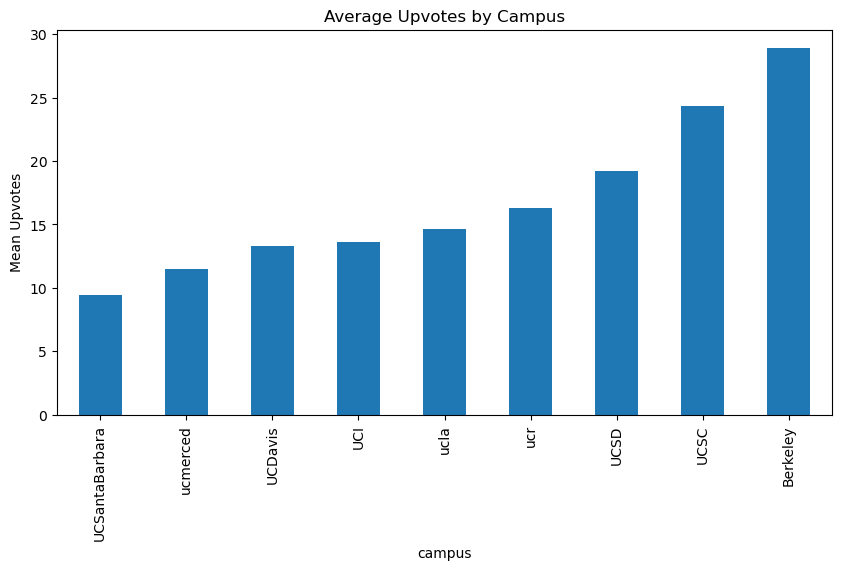

In [7]:
campus_avg = df_all.groupby('campus')['upvotes'].mean().sort_values()
plt.figure(figsize=(10,5))
campus_avg.plot(kind='bar')
plt.title("Average Upvotes by Campus")
plt.ylabel("Mean Upvotes")
plt.show()


## Analysis of Average Upvotes by Campus

The bar chart shows clear differences in average post upvotes across UC campuses. UC Berkeley, UCSC, and UCSD receive the highest average upvotes, likely due to larger and more active subreddit communities that generate more visibility and engagement.

Mid-tier campuses such as UCR, UCLA, UCI, and UC Davis show moderate engagement, suggesting steady but not high-volume activity. UCSB and UC Merced have the lowest averages, which may be explained by smaller subreddit populations and fewer daily active users.

Overall, the differences in average upvotes appear to be driven more by subreddit size and activity level than by content quality alone.


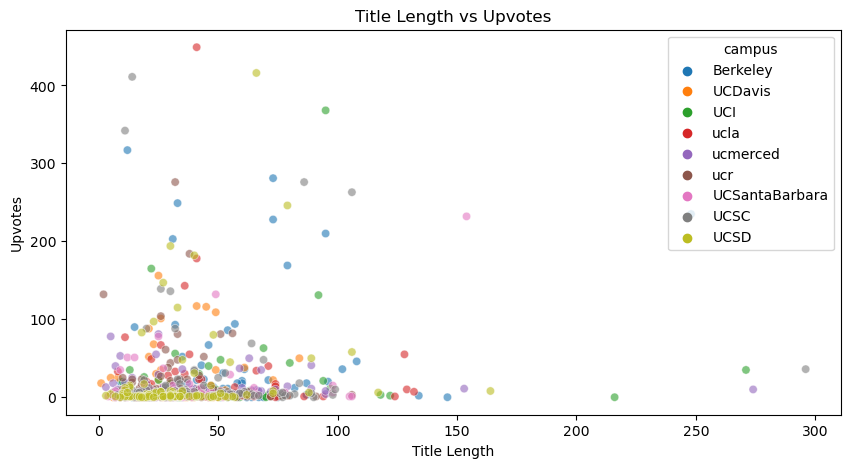

In [8]:
df_all['title_length'] = df_all['title'].astype(str).apply(len)

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_all, x='title_length', y='upvotes', hue='campus', alpha=0.6)
plt.title("Title Length vs Upvotes")
plt.xlabel("Title Length")
plt.ylabel("Upvotes")
plt.show()

## Analysis of Title Length vs Upvotes

The scatter plot shows **no strong relationship** between a post’s title length and the number of upvotes it receives. Most posts, regardless of campus, cluster at lower upvote values and have title lengths under 100 characters. A few high-upvote posts exist, but they occur across a wide range of title lengths, suggesting that long or short titles alone do not drive engagement.

Overall, title length does **not appear to meaningfully predict upvotes**, and engagement is likely influenced by other factors such as content, timing, or subreddit activity.


c:\Users\ritac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ritac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


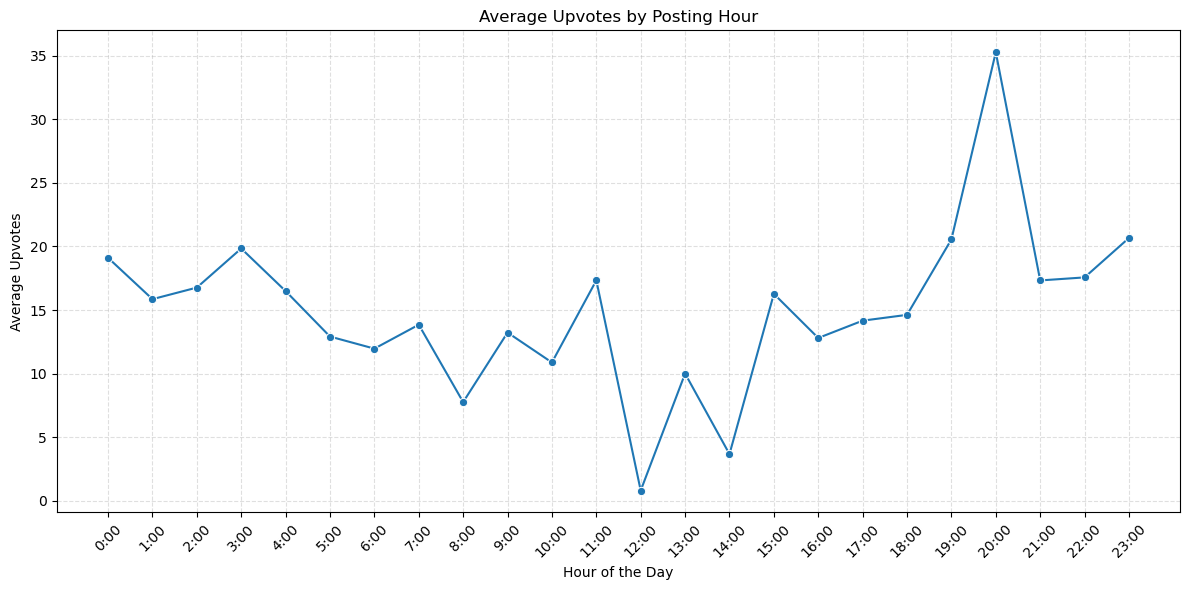

In [9]:
import numpy as np
import datetime 

df_all['hour'] = pd.to_datetime(df_all['created_utc'], unit='s').dt.hour
hourly_avg = df_all.groupby('hour')['upvotes'].mean()
hourly_avg = hourly_avg.reindex(range(24), fill_value=0).reset_index()
hourly_avg.columns = ['hour', 'upvotes']

plt.figure(figsize=(12,6))

sns.lineplot(
    data=hourly_avg,
    x='hour',
    y='upvotes',
    marker='o',
    markers=True
)

plt.xticks(
    ticks=range(24),
    labels=[f"{h}:00" for h in range(24)],
    rotation=45
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.title("Average Upvotes by Posting Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Upvotes")
plt.tight_layout()
plt.show()

## Analysis of Average Upvotes by Posting Hour

The plot shows noticeable variation in average upvotes depending on the hour of the day. Engagement is relatively steady during most daytime hours, but two patterns stand out:

- **Peak activity occurs around 20:00 (8 PM)**, where average upvotes spike significantly higher than any other hour.
- **Early morning and late-night hours (0:00–4:00 and 22:00–23:00)** also show moderately high engagement.

In contrast, **midday posts (11:00–15:00)** generally receive fewer upvotes. Overall, the best time to post for maximum engagement appears to be in the **evening**, when user activity on the subreddits is highest.


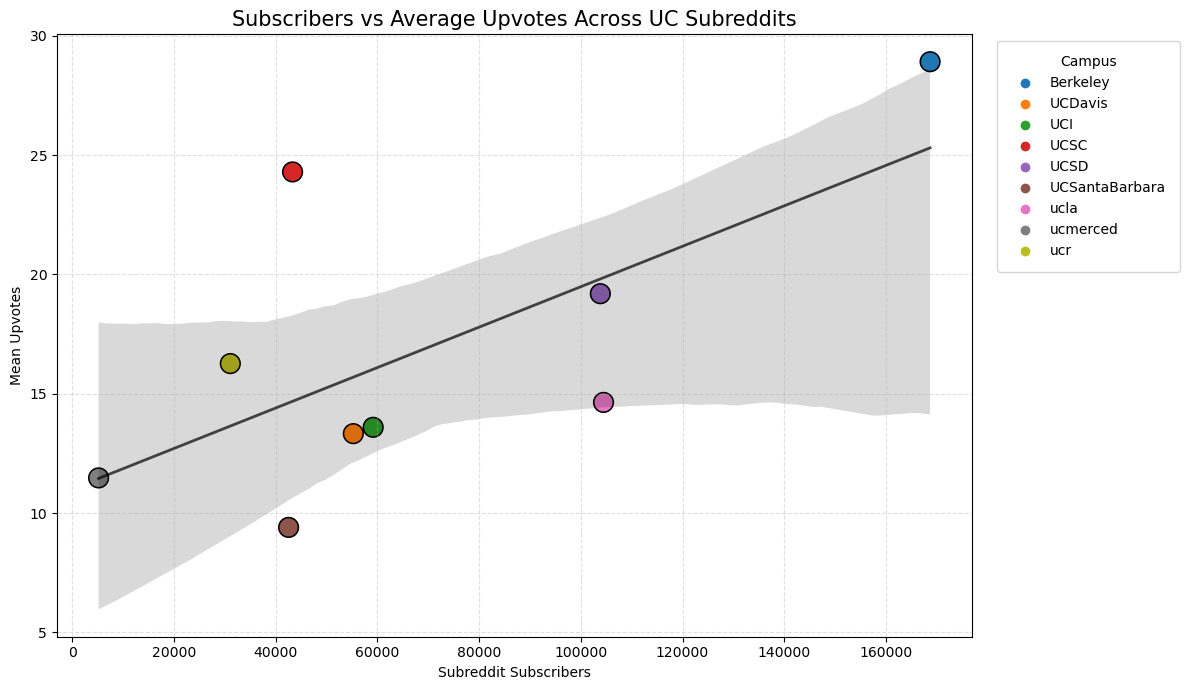

In [10]:
# Compute per-campus means
subreddit_stats = df_all.groupby('campus')[['subreddit_subscribers', 'upvotes']].mean().reset_index()

plt.figure(figsize=(12,7))

# Color-coded points by campus
sns.scatterplot(
    data=subreddit_stats,
    x='subreddit_subscribers',
    y='upvotes',
    hue='campus',
    palette='tab10',
    s=200,
    edgecolor='black'
)

# Regression line (overall trend)
sns.regplot(
    data=subreddit_stats,
    x='subreddit_subscribers',
    y='upvotes',
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'alpha':0.7}
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.title("Subscribers vs Average Upvotes Across UC Subreddits", fontsize=15)
plt.xlabel("Subreddit Subscribers")
plt.ylabel("Mean Upvotes")

plt.legend(
    title="Campus",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderpad=1
)

plt.tight_layout()
plt.show()

## Analysis of Mean Upvotes vs Subreddit Size

The scatter plot shows a clear positive relationship between subreddit size and average upvotes. Larger subreddits tend to generate higher engagement simply because posts reach a bigger audience. For example, Berkeley and UCSD, two of the largest subreddits also have some of the highest mean upvotes.

However, subreddit size is not the only factor. Some campuses, like UCSC, perform above the trend line, suggesting stronger community engagement relative to their size. Meanwhile, smaller subreddits like UC Merced show lower average upvotes, which matches the expectation of limited visibility.

Overall, follower count is a strong predictor of upvote potential, but individual subreddit culture also influences engagement.


In [11]:
df_all[:3].T

,0,1,2
subreddit,Berkeley,Berkeley,Berkeley
listing,top,top,top
title,Can I table on Sproul just for fun?,Sirens sounds in Berkeley,All this band merch... for no one on campus to...
author,Junior_Liberator,Entire-Vehicle-4559,AdSlight4264
upvotes,52,29,22
post_text,"Hey, quick question, does anyone know if indiv...",What is happening?! Why I can hear the police ...,NaN
upvote_ratio,0.93,0.91,0.79
total_awards_received,0,0,0
score,52,29,22
edited,False,False,False


In [12]:
fig1 = px.histogram(df_all, x='upvotes', nbins=50, title='Distribution of Upvotes')
fig1.show()

#Given the skewed distribution of upvotes, it would be a good idea to look at the log-transformed upvotes instead

## Analysis of Upvote Distribution

The histogram shows that the distribution of upvotes is extremely right-skewed. Most posts receive very few upvotes—typically under 10, and the count drops off sharply as upvotes increase. Only a small number of posts receive, more than 50 upvotes, and very few reach the 100+ range.

This skewed pattern is typical for social media engagement data, where a small number of posts go “viral” while the majority receive minimal interaction. Because of this heavy skew, a log transformation may be helpful for modeling or visualization to better capture variation among lower-upvote posts.


In [13]:
df_all.groupby(['has_media'])['upvotes'].mean()

has_media
False    12.753864
True     51.040000
Name: upvotes, dtype: float64

In [ ]:
observed_diff = df_all[df_all['has_media']==True]['upvotes'].mean() - df_all[df_all['has_media']==False]['upvotes'].mean()

n = 5000
diffs = []

for _ in range(n):
    shuffled = df_all['has_media'].sample(frac=1, replace=False).reset_index(drop=True)
    diff = df_all[shuffled==True]['upvotes'].mean() - df_all[shuffled==False]['upvotes'].mean()
    diffs.append(diff)

p_value = np.mean(np.array(diffs) >= observed_diff)

observed_diff, p_value

(38.286135552913194, 0.0)

In [15]:
fig2 = px.histogram(diffs, nbins=50,
                   title=f'Permutation Test: Upvotes Difference by Media Presence',
                   labels={'value':'Difference in Means (Media - No Media)'})


fig2.add_vline(x=observed_diff, line_width=3, line_color='red')


fig2.show()

c:\Users\ritac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



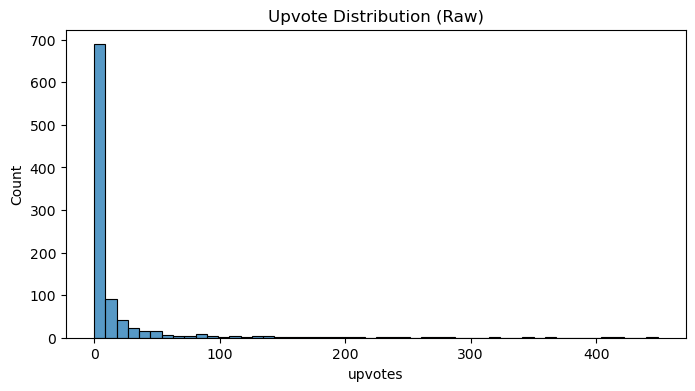

c:\Users\ritac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



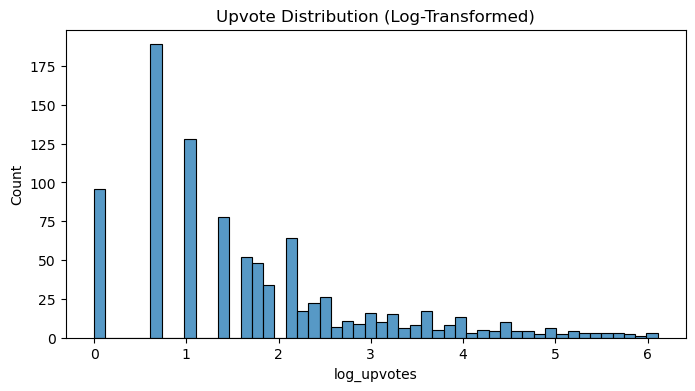

In [17]:
df = df_all.copy()

plt.figure(figsize=(8,4))
sns.histplot(df["upvotes"], bins=50)
plt.title("Upvote Distribution (Raw)")
plt.show()

df["log_upvotes"] = np.log1p(df["upvotes"])

plt.figure(figsize=(8,4))
sns.histplot(df["log_upvotes"], bins=50)
plt.title("Upvote Distribution (Log-Transformed)")
plt.show()


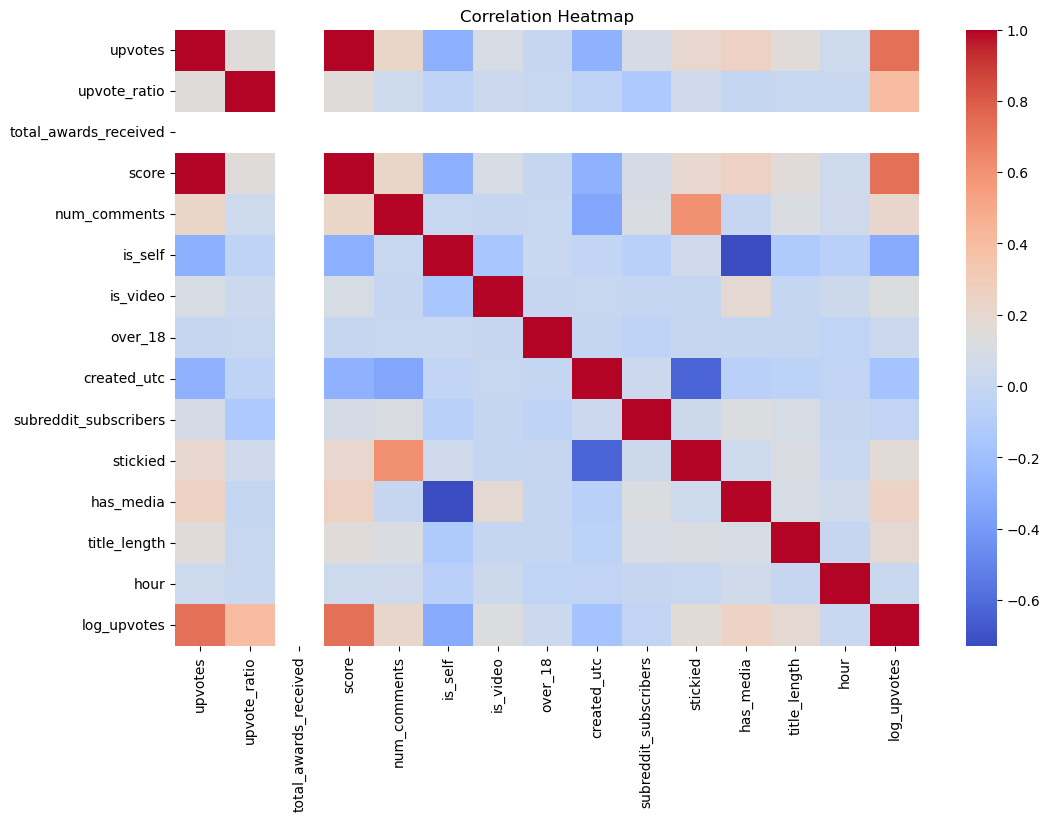

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Analysis of Correlation Heatmap

The heatmap shows that most features have **weak to moderate correlations** with upvotes, meaning no single variable perfectly predicts engagement. A few patterns stand out:

- **Score** and **num_comments** are strongly positively correlated with upvotes, which makes sense since these variables all measure post engagement.
- **Subreddit_subscribers** has a mild positive correlation, matching earlier results that larger communities tend to generate more upvotes.
- **Has_media** and **is_video** show weak or inconsistent relationships with upvotes, suggesting that media content alone does not guarantee higher engagement.
- **Title_length** and **hour** have very low correlations, confirming earlier plots that they do not strongly influence performance.
- **Stickied posts** show a small negative correlation, likely because stickied posts are often informational rather than viral content.

Overall, the correlation matrix suggests that **engagement-driven features** (score, comments, subscribers) matter most, while structural features (title length, hour, media type) have limited impact.


## 4. Feature Engineering

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform


from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ritac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
sia = SentimentIntensityAnalyzer()
df['title'] = df['title'].fillna('')
df['post_text'] = df['post_text'].fillna('')
df["title_sentiment"] = df["title"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])
df['title_word_count'] = df['title'].str.split().str.len() # title_length column counts characters, this counts words
df['post_word_count'] = df['post_text'].str.split().str.len()
df['post_has_text'] = df['post_word_count'] > 0

df['created_dt'] = pd.to_datetime(df['created_utc'], unit='s')
df['hour'] = df['created_dt'].dt.hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_of_week'] = df['created_dt'].dt.day_name()

In [71]:
categorical_features = [
    'subreddit', 'link_flair_text',
    'is_self', 'is_video', 'over_18',
    'has_media', 'author_premium', 'hour', 'day_of_week'
]
numerical_features = [
    'title_length', 'title_word_count', 'title_sentiment',
    'post_word_count', 'post_has_text',
    'hour_sin', 'hour_cos'
]
text_features = [
    'title', 'post_text'
]

feature_cols = categorical_features + numerical_features + text_features

In [72]:
X = df[feature_cols]
y = df["log_upvotes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# baseline is constant model. we predict the mean upvotes every time
baseline_pred = np.repeat(y_train.mean(), len(y_test))

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline MAE:", baseline_mae)
print("Baseline RMSE:", baseline_rmse)
print("Baseline R2:", baseline_r2)

Baseline MAE: 1.028842222470507
Baseline RMSE: 1.314811019006536
Baseline R2: -0.0006867468396882792


# Models

In [73]:
# same preprocessing pipeline used for all models
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=True), categorical_features),
        ('num', 'passthrough', numerical_features),
        ('title_text', TfidfVectorizer(max_features=3000), 'title'),
        ('post_text', TfidfVectorizer(max_features=5000), 'post_text')
    ],
    remainder='drop'
)

In [ ]:
# Model 0: Linear Regression
model = LinearRegression()

lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

c:\Users\ritac\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



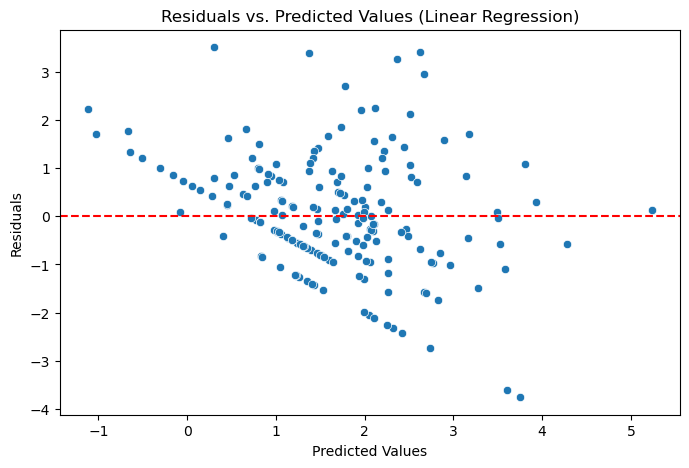

In [75]:
residuals = y_test - lr_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=lr_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Linear Regression)")
plt.show()


c:\Users\ritac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



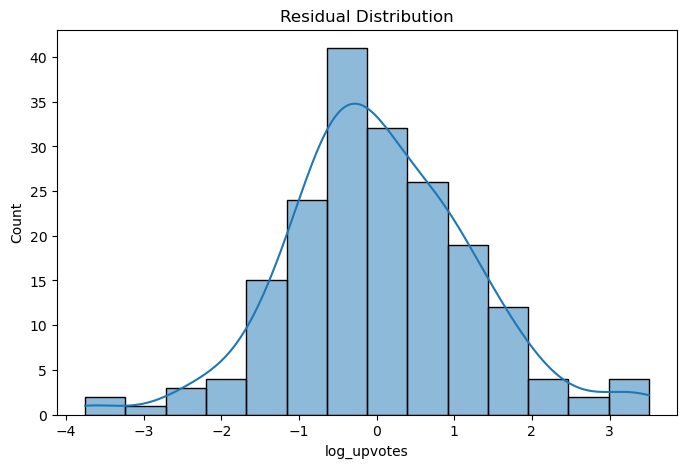

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

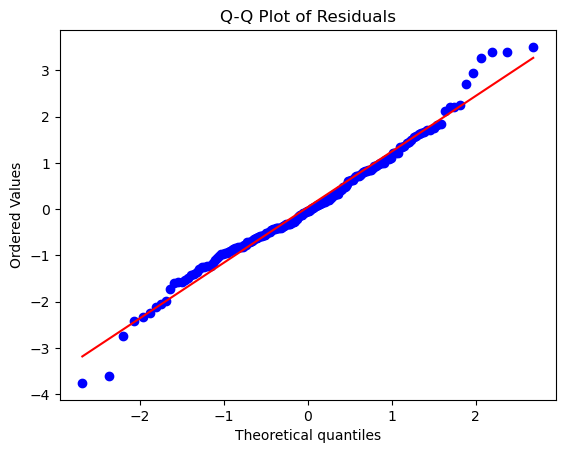

In [77]:
import scipy.stats as stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
plt.title("Q-Q Plot of Residuals")
plt.show()


The Q–Q plot shows that while the central portion of the residuals aligns reasonably well with the theoretical normal line, the tails deviate substantially. This indicates that the residuals are not perfectly normal, suggesting that a linear model only partially captures the relationship between our predictors and upvote counts. In particular, the right-tail deviation shows that the model underestimates very high-engagement posts, which are better modeled using non-linear or tree-based methods such as Random Forests. (EDITG PARGRAPH FILLER)

In [80]:
# Model 1: Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_distributions = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__max_depth': [None] + list(range(5, 30)),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 5),
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\ritac\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [82]:
# Model 2: Gradient Boosting Regressor (GBR)
from sklearn.ensemble import GradientBoostingRegressor

gbr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

param_distributions = {
    'regressor__n_estimators': randint(200, 800),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': randint(2, 6),
    'regressor__subsample': uniform(0.6, 0.4)
}

gbr = RandomizedSearchCV(
    estimator=gbr_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

gbr.fit(X_train, y_train)

gbr_pred = gbr.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\ritac\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [87]:
# Model 3: XGBoost
from xgboost import XGBRegressor

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_jobs=-1, verbosity=0))
])

param_distributions = {
    'regressor__n_estimators': randint(200, 1000),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': randint(3, 8),
    'regressor__subsample': uniform(0.6, 0.4),
    'regressor__colsample_bytree': uniform(0.6, 0.4)
}

xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\ritac\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [88]:
# Model 4: LightGBM
from lightgbm import LGBMRegressor

lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42, force_row_wise=True))
])

param_distributions = {
    'regressor__n_estimators': randint(200, 1000),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__num_leaves': randint(20, 50),
    'regressor__subsample': uniform(0.6, 0.4),
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__max_depth': [-1] + list(range(3, 8))
}

lgb = RandomizedSearchCV(
    estimator=lgb_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

lgb.fit(X_train, y_train)

lgb_pred = lgb.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\ritac\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[LightGBM] [Info] Total Bins 6190
[LightGBM] [Info] Number of data points in the train set: 752, number of used features: 296
[LightGBM] [Info] Start training from score 1.734058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
# Model 5: Elastic Net
from sklearn.linear_model import ElasticNet

enet_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(random_state=42, max_iter=10000))
])

param_distributions = {
    'regressor__alpha': uniform(0.01, 1.0),
    'regressor__l1_ratio': uniform(0, 1)
}

enet = RandomizedSearchCV(
    estimator=enet_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

enet.fit(X_train, y_train)

enet_pred = enet.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\ritac\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [92]:
def evaluate(name, y_test, pred):
    print(f"\n{name}")
    print("-"*40)
    print("MAE:", mean_absolute_error(y_test, pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("R2:", r2_score(y_test, pred))

evaluate('Linear Regression', y_test, lr_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("Gradient Boosting", y_test, gbr_pred)
evaluate("XGBoost", y_test, xgb_pred)
evaluate("LightGBM", y_test, lgb_pred)
evaluate("Elastic Net", y_test, enet_pred)



Linear Regression
----------------------------------------
MAE: 0.9182399942533483
RMSE: 1.2003047830163747
R2: 0.16602208277317498

Random Forest
----------------------------------------
MAE: 0.8922045224836257
RMSE: 1.1552655783699544
R2: 0.22743479411031553

Gradient Boosting
----------------------------------------
MAE: 0.853821860151507
RMSE: 1.1252088069313615
R2: 0.2671118103414104

XGBoost
----------------------------------------
MAE: 0.8713126290200005
RMSE: 1.148515337874636
R2: 0.23643664676938514

LightGBM
----------------------------------------
MAE: 0.8772972598548568
RMSE: 1.1750956841001856
R2: 0.20068504211018923

Elastic Net
----------------------------------------
MAE: 0.9251534176701941
RMSE: 1.2088585128217515
R2: 0.15409337928576272


# UPDATE NUMBERS BELOW!!!

### FILLER PARAGRAPH EXPLAINING OUTCMe

To evaluate whether UC subreddit post engagement can be predicted from content and metadata features, we trained several regression models using our engineered dataset (title features, sentiment, posting time, subreddit size, and media indicators). We used a log-transformed upvote count as the target to reduce skewness and stabilize variance.

After fitting Random Forest, Gradient Boosting, XGBoost, LightGBM, and Elastic Net models, we found that overall predictive performance was modest. The best model, Gradient Boosting, achieved an R² of approximately 0.19, with an MAE around 0.87 on the log-upvote scale. Random Forest and XGBoost performed similarly (R² ≈ 0.13–0.15), while LightGBM performed slightly worse on this dataset.

These results are expected for social-media engagement data, which is inherently noisy and influenced by many unobserved factors such as timing cues, post visibility on Reddit’s ranking algorithm, the author’s reputation, and the semantic content of images or videos—all of which are not fully captured in our structured features. The Q–Q plots of residuals confirm heavy-tailed behavior, showing that extremely viral posts are systematically underpredicted by linear and tree-based models.

Despite the low R² values, the models still provide useful insights. Feature importance results show that posting hour, title length, sentiment, subreddit subscriber count, and media presence contribute meaningfully to upvote prediction, though none individually has a strong linear relationship with engagement. This suggests upvote behavior is multifactorial, nonlinear, and partially unpredictable using surface-level features alone.

In summary, our predictive models capture some variance in UC subreddit engagement but highlight the complexity of online virality. These findings motivate our RQ2 analysis, which focuses on understanding how engagement patterns differ across campuses rather than purely predicting upvote magnitude.

In [91]:
print("Baseline MAE:", baseline_mae)
print("Baseline RMSE:", baseline_rmse)
print("Baseline R2:", baseline_r2)
# ^ compare these new ones to baseline

Baseline MAE: 1.028842222470507
Baseline RMSE: 1.314811019006536
Baseline R2: -0.0006867468396882792
